In [1]:
from PIL import Image
from itertools import product
import os

In [2]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# Slice Images

In [ ]:
# Slices the input image into 100x100 px boxes
def tile(filename, dir_in, dir_out, d):
    name, ext = os.path.splitext(filename)
 
    #Keep count of number of slices
    count = 0

    img = Image.open(os.path.join(dir_in, filename))
    w, h = img.size
    
    grid = product(range(0, h-h%d, d), range(0, w-w%d, d))
    for i, j in grid:
        box = (j, i, j+d, i+d)
        out = os.path.join(dir_out, f'{name}_{i}_{j}{ext}')
        img.crop(box).save(out)
        count+=1

    print(f'Generated {count} slices from the inputs')

In [ ]:
%ls -l 'gdrive/MyDrive/Mini Project/DS_Gen/inputs/'

in_dir = 'gdrive/MyDrive/Mini Project/DS_Gen/inputs/'
out_dir = 'gdrive/MyDrive/Mini Project/DS_Gen/outputs/'


total 1775
-rw------- 1 root root 137476 Jun 20 11:55 input1.png
-rw------- 1 root root 279277 Jun 20 12:19 input2.png
-rw------- 1 root root 368014 Jun 20 12:21 input3.png
-rw------- 1 root root 460009 Jun 20 12:22 input4.png
-rw------- 1 root root 571762 Jun 20 12:31 input5.png


In [ ]:
# Flush the output directory
def flush_output_dir(flush_path):
  flush_files_list = os.listdir(flush_path)
  for f in flush_files_list:
    try:
      os.remove(f'{flush_path}/{f}')
    except:
      print(f'Error while deleting file : {flush_path}/{f}')

flush_output_dir(out_dir)

In [ ]:
in_files_list = os.listdir(in_dir)

for f in in_files_list:
  print(f)
  tile(f,in_dir,out_dir,100)
# tile('input1.png', ,'gdrive/MyDrive/Mini Project/DS_Gen/outputs/', 100)

input1.png
Generated 35 slices from the inputs
input3.png
Generated 48 slices from the inputs
input2.png
Generated 63 slices from the inputs
input4.png
Generated 24 slices from the inputs
input5.png
Generated 24 slices from the inputs


# Segregation Tool

In [20]:
import cv2
from google.colab.patches import cv2_imshow
import shutil
import os
import random
from IPython.display import clear_output 
import time
import matplotlib.pyplot as plt
from skimage.io import imread
try:
 from PIL import Image
except ImportError:
 import Image

In [15]:
#function to plot the image
def plot_image(image, title=""):
  plt.imshow(image), plt.title(title, size=14), plt.axis('off')
  plt.show()

In [5]:
def load_input_paths(dirpath):
  dir_files = os.listdir(dirpath)
  return [(f"{dirpath}{fname}") for fname in dir_files]

In [6]:
# Loads image into Memory and convert to RGB format
def load_image(p):
  img=imread(p)
  return img

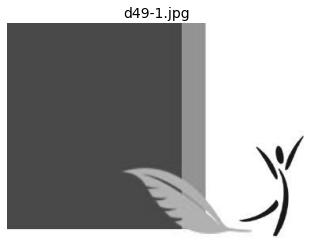

Is this Text?(1) or non-text(0)-1


In [27]:
dir_path = 'gdrive/MyDrive/Mini Project/NewOutput/'
files_list = os.listdir('gdrive/MyDrive/Mini Project/NewOutput/')
text_files_list = os.listdir(dir_path+'TextDataset/')
nontext_files_list = os.listdir(dir_path+'NonTextDataset/')

for f in files_list:
  if f[0]=='d' and f not in text_files_list and f not in nontext_files_list:
    
    plot_image(load_image(dir_path+f),f)
    time.sleep(0.1)
    # print('Is this Text?(1) or non-text(0)')
    choice = input("Is this Text?(1) or non-text(0)")
    if(choice == '-1'):
      break
    elif(choice == '1'):
      try:
        shutil.move(dir_path+f, dir_path+'TextDataset/'+f)
      except:
        print(f"Error copying file to Text{f}")
    elif(choice == '0'):
      try:
        shutil.move(dir_path+f, dir_path+'NonTextDataset/'+f)
      except:
        print(f"Error copying file to Nontext{f}")
    else:
        print("Invalid input, skipping")
    time.sleep(0.2)
    clear_output()

In [33]:
# Remove duplicates by filename

dir_path = 'gdrive/MyDrive/Mini Project/NewOutput/'
files_list = os.listdir('gdrive/MyDrive/Mini Project/NewOutput/')
text_files_list = os.listdir(dir_path+'TextDataset/')
nontext_files_list = os.listdir(dir_path+'NonTextDataset/')

for f in files_list:
  if (f in text_files_list or f in nontext_files_list):
    try:
      os.remove(dir_path+f)
      print(f"Deleting {f}")
    except:
      print(f"Error removing file{f}")

In [37]:
dir_path = 'gdrive/MyDrive/Mini Project/NewOutput/'
files_list = os.listdir('gdrive/MyDrive/Mini Project/NewOutput/')
text_files_list = os.listdir(dir_path+'TextDataset/')
nontext_files_list = os.listdir(dir_path+'NonTextDataset/')

print(len(text_files_list))

601
